In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# 저장된 피처 튜닝 데이터 불러오기
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/악성 URL/DATA/Real_train.csv')

In [ ]:
print(train.columns)  # 모든 칼럼 이름 출력



Index(['ID', 'URL', 'label', 'length', 'subdomain_count', 'has_special_char',
       'special_char_count', 'number_of_meaning_words', 'tld_malicious',
       'path_depth', 'max_numeric_sequence', 'blacklist_word_count',
       'suspicious_keyword_flag'],
      dtype='object')


In [ ]:
X,y = train.drop(columns=['ID','URL','label']),train['label']


X_sampled = X.sample(n=70000, random_state=42, replace=True)
y_sampled = y.loc[X_sampled.index]
# 샘플링된 데이터를 바탕으로 train, test split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, stratify=y_sampled, random_state=42)

# 파라미터 튜닝 결과 시각화하는 함수 정의

In [ ]:
import matplotlib.pyplot as plt

def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.show()  # 시각화를 화면에 출력

In [ ]:
algorithm = RFC
algorithm_name = 'rfc'

In [ ]:
feature_name = X_train.columns.tolist()

# 1. 트리 개수  

In [ ]:
def optimi_estimator(algorithm, algorithm_name, X_train, y_train, X_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []
    test_score = []
    para_n_tree = [n_tree * 5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators=v_n_estimators, random_state=1234)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")

    print(round(df_score_n, 4))

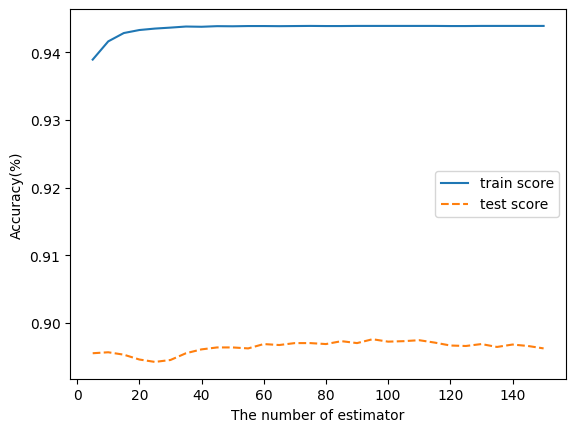

    n_estimators  TrainScore  TestScore
0              5      0.9389     0.8955
1             10      0.9416     0.8956
2             15      0.9429     0.8953
3             20      0.9433     0.8946
4             25      0.9435     0.8942
5             30      0.9437     0.8945
6             35      0.9438     0.8955
7             40      0.9438     0.8961
8             45      0.9439     0.8964
9             50      0.9439     0.8964
10            55      0.9439     0.8962
11            60      0.9439     0.8969
12            65      0.9439     0.8967
13            70      0.9439     0.8970
14            75      0.9439     0.8970
15            80      0.9439     0.8969
16            85      0.9439     0.8973
17            90      0.9439     0.8970
18            95      0.9439     0.8976
19           100      0.9439     0.8972
20           105      0.9439     0.8973
21           110      0.9439     0.8974
22           115      0.9439     0.8971
23           120      0.9439     0.8966


In [ ]:
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name,
                 X_train, y_train, X_test, y_test,
                 n_estimator_min, n_estimator_max)

In [ ]:
n_estimator = 95

# 2. 트리 깊이

In [ ]:
def optimi_maxdepth (algorithm, algorithm_name, X_train, y_train, X_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
    # 랜덤 포레스트 모델을 사용할 때 max_depth와 n_estimators 설정
      model = algorithm(max_depth = v_max_depth,
                      n_estimators = n_estimator,
                      random_state=1234)

      model.fit(X_train, y_train)  # 모델 학습
      train_score.append(model.score(X_train, y_train))  # 학습 데이터 정확도 저장
      test_score.append(model.score(X_test, y_test))  # 테스트 데이터 정확도 저장

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

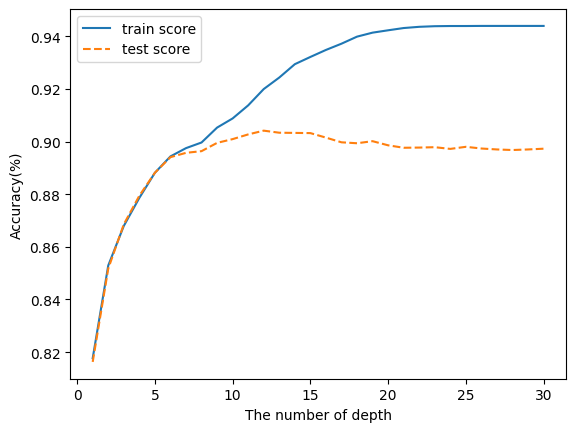

    depth  TrainScore  TestScore
0       1      0.8177     0.8163
1       2      0.8529     0.8517
2       3      0.8679     0.8686
3       4      0.8786     0.8794
4       5      0.8881     0.8881
5       6      0.8944     0.8941
6       7      0.8975     0.8957
7       8      0.8996     0.8964
8       9      0.9053     0.8995
9      10      0.9088     0.9009
10     11      0.9138     0.9027
11     12      0.9199     0.9041
12     13      0.9243     0.9034
13     14      0.9294     0.9033
14     15      0.9321     0.9032
15     16      0.9348     0.9015
16     17      0.9372     0.8997
17     18      0.9399     0.8994
18     19      0.9414     0.9001
19     20      0.9423     0.8986
20     21      0.9431     0.8976
21     22      0.9436     0.8977
22     23      0.9438     0.8979
23     24      0.9439     0.8972
24     25      0.9439     0.8980
25     26      0.9439     0.8974
26     27      0.9439     0.8970
27     28      0.9439     0.8968
28     29      0.9439     0.8970
29     30 

In [ ]:
depth_min = 1
depth_max = 31
optimi_maxdepth(algorithm, algorithm_name,
                X_train, y_train, X_test, y_test,
                depth_min, depth_max, n_estimator)

In [ ]:
n_depth = 12

# 3. 최소 노드 분할 샘플 수

In [ ]:
def optimi_minsplit (algorithm, algorithm_name, X_train, y_train, X_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
      model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 1234)
      model.fit(X_train, y_train)
      train_score.append(model.score(X_train, y_train))
      test_score.append(model.score(X_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

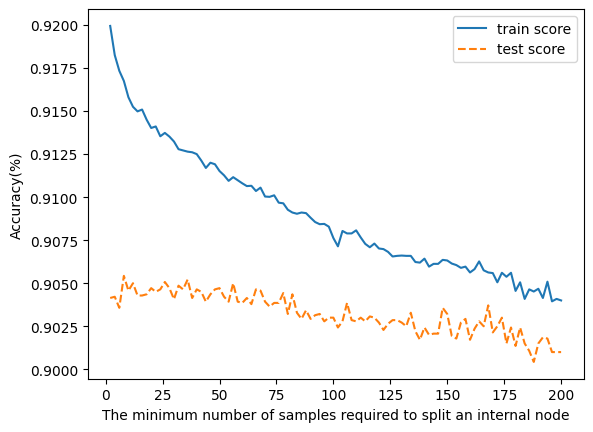

    min_samples_split  TrainScore  TestScore
0                   2      0.9199     0.9041
1                   4      0.9182     0.9042
2                   6      0.9173     0.9036
3                   8      0.9168     0.9054
4                  10      0.9158     0.9046
5                  12      0.9152     0.9050
6                  14      0.9150     0.9043
7                  16      0.9151     0.9043
8                  18      0.9145     0.9044
9                  20      0.9140     0.9047
10                 22      0.9141     0.9045
11                 24      0.9135     0.9046
12                 26      0.9137     0.9051
13                 28      0.9135     0.9047
14                 30      0.9132     0.9041
15                 32      0.9128     0.9049
16                 34      0.9127     0.9046
17                 36      0.9126     0.9052
18                 38      0.9126     0.9041
19                 40      0.9125     0.9046
20                 42      0.9121     0.9045
21        

In [ ]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train, y_train, X_test, y_test,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [ ]:
n_split = 6

# 4. 리프 노드 최소 샘플

In [ ]:
def optimi_minleaf(algorithm, algorithm_name, X_train, y_train, X_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
      model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
      model.fit(X_train, y_train)
      train_score.append(model.score(X_train, y_train))
      test_score.append(model.score(X_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

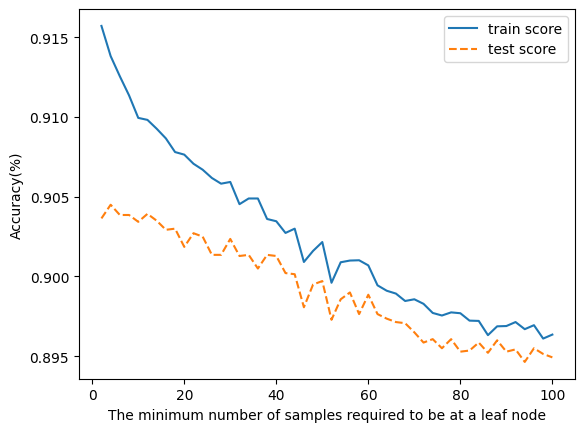

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9157     0.9036
1                  4      0.9138     0.9045
2                  6      0.9126     0.9039
3                  8      0.9114     0.9039
4                 10      0.9099     0.9034
5                 12      0.9098     0.9039
6                 14      0.9093     0.9035
7                 16      0.9087     0.9029
8                 18      0.9078     0.9030
9                 20      0.9076     0.9019
10                22      0.9071     0.9027
11                24      0.9067     0.9025
12                26      0.9062     0.9014
13                28      0.9058     0.9014
14                30      0.9059     0.9024
15                32      0.9045     0.9013
16                34      0.9049     0.9014
17                36      0.9049     0.9005
18                38      0.9036     0.9014
19                40      0.9035     0.9013
20                42      0.9027     0.9002
21                44      0.9030

In [ ]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name,
               X_train, y_train, X_test, y_test,
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [ ]:
n_leaf = 4

# roc_auc값

In [ ]:
def model_final_rf(algorithm, algorithm_name,
                   X_train, y_train, X_test, y_test,
                   n_estimator, n_depth, n_split, n_leaf):
    # 모델 정의 (여기서는 RandomForestClassifier 사용)
    model = algorithm(n_estimators=n_estimator,
                      max_depth=n_depth,
                      min_samples_split=n_split,
                      min_samples_leaf=n_leaf)

    # 모델 학습
    model.fit(X_train, y_train)

    y_pred_prob = model.predict_proba(X_test)[:, 1]  # 확률을 사용하여 AUC 계산

    # AUC-ROC 계산
    auc_score = roc_auc_score(y_test, y_pred_prob)

    # AUC-ROC 출력
    print(f"{algorithm_name} - AUC-ROC Score: {auc_score:.4f}")



In [ ]:
algorithm = RFC
algorithm_name = 'rfc'

In [ ]:
model_final_rf(algorithm, algorithm_name, X_train, y_train, X_test, y_test,
               n_estimator, n_depth, n_split, n_leaf)


rfc - AUC-ROC Score: 0.9196


In [ ]:
def model_final(algorithm, algorithm_name,
                X_train, y_train, X_test, y_test,
                n_estimator, n_depth, n_split, n_leaf):
    # 모델 정의 (여기서는 RandomForestClassifier를 예시로 사용)
    model = algorithm(n_estimators=n_estimator,
                      max_depth=n_depth,
                      min_samples_split=n_split,
                      min_samples_leaf=n_leaf)

    # 모델 학습
    model.fit(X_train, y_train)

    # 테스트 데이터 예측 (확률을 사용하여 AUC 계산)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # 확률을 사용하여 AUC 계산

    # AUC-ROC 계산
    auc_score = roc_auc_score(y_test, y_pred_prob)

    # AUC-ROC 출력
    print(f"{algorithm_name} - AUC-ROC Score: {auc_score:.4f}")

model_final(RFC, 'rfc', X_train, y_train, X_test, y_test,
            n_estimator, n_depth, n_split, n_leaf)

rfc - AUC-ROC Score: 0.9193


# 원래 찾았던 최적값이랑 비교

In [ ]:
clf1 = RFC(
    criterion='gini',
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=25,
    min_samples_split=50,
    n_estimators=200,
    random_state=42
)


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier as RFC

# 모델 학습
clf1.fit(X_train, y_train)

# 예측 확률 가져오기
y_pred_prob = clf1.predict_proba(X_test)[:, 1]

# ROC-AUC 스코어 계산
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9184


#gridsearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수 적정화
    'criterion': ['gini', 'entropy'],  # 두 가지 분할 기준 고려
    'max_depth': [10, 30],
    'min_samples_split': [4, 6, 10],  # 최소 샘플 수 적절화
    'min_samples_leaf': [2, 20],  # 리프 노드 최소 샘플 수 적절화
    'max_features': ['sqrt']  # 'sqrt'로 고정 (log2는 불필요할 수 있음)
}


grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),  # 재현성을 위한 random_state 설정
    param_grid,
    cv=3,  # 5-Fold Cross Validation
    n_jobs=-1,  # 모든 CPU 코어 사용
    verbose=2  # 진행 상황 출력 (1보다 높여서 더 자세한 로그 확인 가능)
)

grid_search.fit(X_train[:1000], y_train[:1000])

print('최적의 파라미터 조합:', grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
최적의 파라미터 조합: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import roc_auc_score

# 최적의 모델 가져오기
Decision_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 확률
y_pred_proba = Decision_model.predict_proba(X_test)[:, 1]

# ROC AUC 점수 계산
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC AUC Score: {roc_auc}')



ROC AUC Score: 0.9054006423133636
